In [33]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


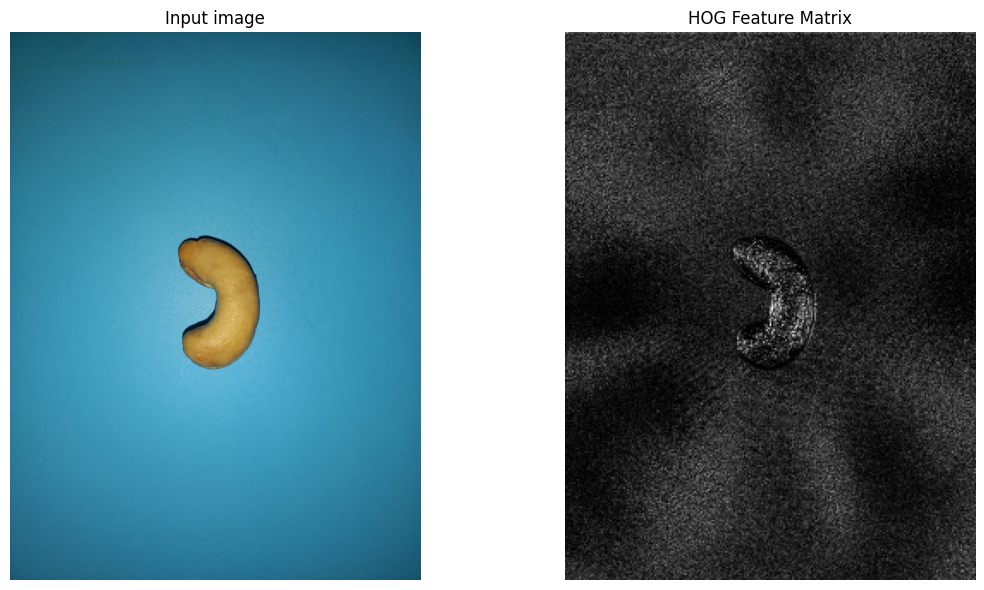

In [41]:
import matplotlib.pyplot as plt
from skimage import io, color, feature

# Đọc ảnh màu
img = io.imread("C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\Nuts\\001_nut.jpg")

# Chuyển đổi ảnh màu sang ảnh xám
gray_img = color.rgb2gray(img)

# Trích xuất đặc trưng HOG
H = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

# Hiển thị ảnh gốc
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.title('Input image')
plt.axis('off')

# Hiển thị ma trận đặc trưng HOG dưới dạng ảnh grayscale
plt.subplot(122)
plt.imshow(H.reshape((gray_img.shape[0] // 8 - 1, gray_img.shape[1] // 8 - 1, 36))[..., 0],
           cmap='gray')
plt.title('HOG Feature Matrix')
plt.axis('off')

plt.tight_layout()
plt.show()


In [61]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['nut', 'shell']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)
    
    # Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            image = io.imread(image_path)
            gray_image = color.rgb2gray(image)
            hog_feature = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
            
            hog_features.append(hog_feature)
            labels.append(0 if sub_folder == 'nut' else 1)




In [56]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Hiển thị số lượng mẫu trong từng tập
print("Số lượng mẫu huấn luyện:", len(X_train))
print("Số lượng mẫu kiểm tra:", len(X_test))

# # Huấn luyện mô hình SVM
# model = svm.SVC()
# model.fit(X_train, y_train)

# # Đánh giá mô hình trên tập kiểm tra
# accuracy = model.score(X_test, y_test)
# print("Accuracy:", accuracy)


Số lượng mẫu huấn luyện: 53
Số lượng mẫu kiểm tra: 14


In [57]:
# Huấn luyện mô hình SVM
model = svm.SVC()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.42857142857142855


In [60]:
import cv2
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
from sklearn.model_selection import train_test_split
# Đường dẫn đến hình ảnh cần phân loại
test_image_path = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\test3.jpg'

# Đọc ảnh và tiền xử lý
test_image = cv2.imread(test_image_path)
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_img_gauss = cv2.GaussianBlur(gray_test_image, (3, 3), 0)
_, test_img_binary = cv2.threshold(test_img_gauss, 150, 255, cv2.THRESH_BINARY)

# Trích xuất đặc trưng HOG cho ảnh test
test_hog_feature = hog(test_img_binary, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

# Sử dụng mô hình để dự đoán
predicted_label = model.predict([test_hog_feature])

if predicted_label[0] == 0:
    print("Predicted: Nuts")
else:
    print("Predicted: Shell")


Predicted: Shell


In [ ]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
from sklearn.model_selection import train_test_split
import cv2

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['nut', 'shell']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)
    
    # Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            image = io.imread(image_path)
            
            # Tiền xử lý ảnh
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_gauss = cv2.GaussianBlur(gray_image, (3, 3), 0)
            _, img_binary = cv2.threshold(img_gauss, 150, 255, cv2.THRESH_BINARY)
            
            # Trích xuất đặc trưng HOG
            hog_feature = hog(img_binary, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
            
            hog_features.append(hog_feature)
            labels.append(0 if sub_folder == 'nut' else 1)

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
model = svm.SVC()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Đường dẫn đến hình ảnh cần phân loại
test_image_path = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\test3.jpg'

# Đọc ảnh và tiền xử lý
test_image = cv2.imread(test_image_path)
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_img_gauss = cv2.GaussianBlur(gray_test_image, (3, 3), 0)
_, test_img_binary = cv2.threshold(test_img_gauss, 150, 255, cv2.THRESH_BINARY)

# Trích xuất đặc trưng HOG cho ảnh test
test_hog_feature = hog(test_img_binary, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

# Sử dụng mô hình để dự đoán
predicted_label = model.predict([test_hog_feature])

if predicted_label[0] == 0:
    print("Predicted: Nuts")
else:
    print("Predicted: Shell")





In [64]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
import cv2
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['nut', 'shell']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)
    
    # Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            image = io.imread(image_path)
            
            # Tiền xử lý ảnh
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_gauss = cv2.GaussianBlur(gray_image, (3, 3), 0)
            _, img_binary = cv2.threshold(img_gauss, 150, 255, cv2.THRESH_BINARY)
            
            # Trích xuất đặc trưng HOG
            hog_feature = hog(img_binary, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
            
            hog_features.append(hog_feature)
            labels.append(0 if sub_folder == 'nut' else 1)

# Huấn luyện mô hình SVM
model = svm.SVC()
model.fit(hog_features, labels)



SVC()

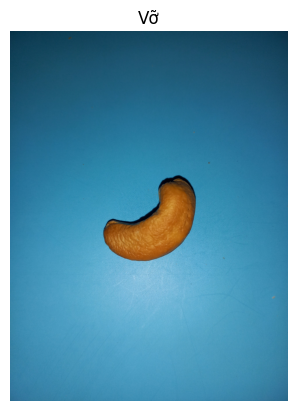

Predicted Class: Vỡ


In [66]:
# Đường dẫn đến ảnh bạn muốn dự đoán
test_image_path = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\test2.jpg'

# Đọc ảnh và tiền xử lý
test_image = cv2.imread(test_image_path)
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_img_gauss = cv2.GaussianBlur(gray_test_image, (3, 3), 0)
_, test_img_binary = cv2.threshold(test_img_gauss, 150, 255, cv2.THRESH_BINARY)

# Trích xuất đặc trưng HOG cho ảnh test
test_hog_feature = hog(test_img_binary, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

# Sử dụng mô hình để dự đoán
predicted_label = model.predict([test_hog_feature])

# Hiển thị hình ảnh với title là tên dự đoán
if predicted_label[0] == 0:
    predicted_class = "Lành"
else:
    predicted_class = "Vỡ"

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title(predicted_class)
plt.axis('off')
plt.show()

print("Predicted Class:", predicted_class)

In [18]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['nut', 'shell']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)
    
    # Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            img = io.imread(image_path)
            
            # Tiền xử lý ảnh
            height, width = img.shape[:2]# Lấy kích thước ban đầu của ảnh
            # Scale theo tỉ lệ hợp lý tùy vào ảnh ban đầu
            new_width = int(width / 3)
            new_height = int(height / 3)
            img = cv2.resize(img, (new_width, new_height))

            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            edges = cv2.Canny(gray_image, 400, 450)

            # Tìm các contour trên hình ảnh cạnh
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # Tìm bounding box có diện tích lớn nhất
            max_area = 0
            max_box = None

            # Tìm bounding box có diện tích lớn nhất trong tất cả các ảnh
            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area > max_area:
                    max_area = area
                    max_box = cv2.boundingRect(cnt)

            if max_box is not None:
                max_x, max_y, max_w, max_h = max_box

            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area > 50:
                    x, y, w, h = cv2.boundingRect(cnt)
                    # Tính toán tỷ lệ điều chỉnh kích thước bounding box
                    scale_x = w / max_w
                    scale_y = h / max_h
                    # Điều chỉnh kích thước của bounding box
                    scaled_w = int(max_w * scale_x)
                    scaled_h = int(max_h * scale_y)
                    roi = gray_image[y:y+scaled_h, x:x+scaled_w]  # Cắt vùng bounding box từ ảnh xám
                    if roi.shape[0] >= 8 and roi.shape[1] >= 8:
                        roi_hog_feature = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
                        print("Kích thước của roi_hog_feature:", roi_hog_feature.shape)
                        hog_features.append(roi_hog_feature)
                        labels.append(0 if sub_folder == 'nut' else 1)
                


# # Tạo danh sách để lưu trữ đặc trưng HOG có cùng kích thước
# hog_features_list = []

# # Duyệt qua các đặc trưng HOG
# for feature in hog_features:
#     if len(feature) == len(hog_features[0]):
#         hog_features_list.append(feature)

# # Chuyển danh sách thành mảng numpy
# hog_features_array = np.array(hog_features_list)


# Sử dụng hog_features_array để huấn luyện hoặc thực hiện phân loại

# # Huấn luyện mô hình SVM
# model = svm.SVC()
# model.fit(hog_features, labels)



Kích thước của roi_hog_feature: (5616,)
Kích thước của roi_hog_feature: (5400,)
Kích thước của roi_hog_feature: (9360,)
Kích thước của roi_hog_feature: (6480,)
Kích thước của roi_hog_feature: (7020,)
Kích thước của roi_hog_feature: (4536,)
Kích thước của roi_hog_feature: (12420,)
Kích thước của roi_hog_feature: (5040,)
Kích thước của roi_hog_feature: (6156,)
Kích thước của roi_hog_feature: (5544,)
Kích thước của roi_hog_feature: (12168,)
Kích thước của roi_hog_feature: (8640,)
Kích thước của roi_hog_feature: (12312,)
Kích thước của roi_hog_feature: (12420,)
Kích thước của roi_hog_feature: (4536,)
Kích thước của roi_hog_feature: (3168,)
Kích thước của roi_hog_feature: (5040,)
Kích thước của roi_hog_feature: (6480,)
Kích thước của roi_hog_feature: (11592,)
Kích thước của roi_hog_feature: (18144,)
Kích thước của roi_hog_feature: (4536,)
Kích thước của roi_hog_feature: (4788,)
Kích thước của roi_hog_feature: (2880,)
Kích thước của roi_hog_feature: (4320,)
Kích thước của roi_hog_feature: (4

# BẮT ĐẦU TỪ ĐÂY

In [2]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

# img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\shell\\032_shell.jpg')
#img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\nut\\033_nut.jpg')

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['nut', 'shell']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)

# Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            img = cv2.imread(image_path)
            grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            height, width = img.shape[:2]
            bb_h, bb_w = 235, 235
            # Thu nhỏ ảnh về một nửa kích thước
            new_width = int(width / 3)
            new_height = int(height / 3)

            img = cv2.resize(img, (new_width, new_height))

            edges = cv2.Canny(img, 300, 400)

            # Tìm các contour trên hình ảnh cạnh
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Tìm bounding box có diện tích lớn nhất
            max_area = 0
            max_box = None
            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area > max_area:
                    max_area = area
                    max_box = cv2.boundingRect(cnt)

            if max_box is not None:
                x, y, w, h = max_box
                center_x = x + w // 2
                center_y = y + h // 2
                    
                # Tính tọa độ góc trái trên của bounding box mới
                new_x = center_x - (bb_h//2)
                new_y = center_y - (bb_w//2)
                    
                #img = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + bb_h, new_y + bb_w), (0, 255, 0), 2)
                roi = grayimg[new_y:new_y+bb_h, new_x:new_x+bb_w]

                if roi.shape[0] >= 8 and roi.shape[1] >= 8:
                    roi_hog_feature = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
                
                    #print("Kích thước của roi_hog_feature:", roi_hog_feature.shape)
                    hog_features.append(roi_hog_feature)
                    labels.append(0 if sub_folder == 'nut' else 1)
                

    # # Hiển thị hình ảnh với bounding box
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title(image_file)
    # plt.show()

# Huấn luyện mô hình SVM
# model = svm.SVC()
# model.fit(hog_features, labels)


### SVM cơ bản

In [61]:

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
model = svm.SVC()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.42857142857142855


### Xây dựng SVM

In [33]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Chuyển danh sách vectơ đặc trưng HOG và nhãn thành numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Khởi tạo mô hình SVM
classifier = SVC(kernel='linear', random_state=0)

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)


Confusion Matrix:
[[ 6  0]
 [10  1]]
Accuracy: 0.4117647058823529


## KNN cơ bản

### Import thư viện

In [1]:
import os
import re
from skimage.feature import hog
from skimage import io, color
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### Trích xuất đặc trưng HOG và chia tập huấn luyện

In [6]:

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\lanh'

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []
bb_h, bb_w = 230,230
for filename in os.listdir(parent_folder):
    if os.path.isfile(os.path.join(parent_folder, filename)):
        file_path = os.path.join(parent_folder, filename)
        img = cv2.imread(file_path)
        height, width = img.shape[:2]
        # Thu nhỏ ảnh về một nửa kích thước
        new_width = int(width / 3)
        new_height = int(height / 3)
        img = cv2.resize(img, (new_width, new_height))
        grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(img, 280, 400)

        # Tìm các contour trên hình ảnh cạnh
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Tìm bounding box có diện tích lớn nhất
        max_area = 0
        max_box = None
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > max_area:
                max_area = area
                max_box = cv2.boundingRect(cnt)

        if max_box is not None:
            x, y, w, h = max_box
            center_x = x + w // 2
            center_y = y + h // 2
                
            # Tính tọa độ góc trái trên của bounding box mới
            new_x = center_x - (bb_h//2)
            new_y = center_y - (bb_w//2)
                
            #img = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + bb_h, new_y + bb_w), (0, 255, 0), 2)
            roi = grayimg[new_y:new_y+bb_h, new_x:new_x+bb_w]

            if roi.shape[0] >= 8 and roi.shape[1] >= 8:
                roi_hog_feature = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                                    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
            
                #print("Kích thước của roi_hog_feature:", roi_hog_feature.shape)
                hog_features.append(roi_hog_feature)
                # Gán nhãn dựa trên tên thư mục con
                labels.append(0 if filename == 'lanh' else 1)

# Chuyển danh sách vectơ đặc trưng HOG và nhãn thành numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Tiêu chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (120,) + inhomogeneous part.

### xây dựng model

In [5]:
# Khởi tạo mô hình KNN
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Huấn luyện mô hình
classifier.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)




Confusion Matrix:
[[9]]
Accuracy: 1.0


### predict KNN

In [1]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\shell\\032_shell.jpg')
#img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\nut\\033_nut.jpg')

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['lanh', 'vo']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)

# Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            img = cv2.imread(image_path)
            grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            height, width = img.shape[:2]
            bb_h, bb_w = 235, 235
            # Thu nhỏ ảnh về một nửa kích thước
            new_width = int(width / 1)
            new_height = int(height / 1)

            img = cv2.resize(img, (new_width, new_height))

            edges = cv2.Canny(img, 300, 400)

            # Tìm các contour trên hình ảnh cạnh
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Tìm bounding box có diện tích lớn nhất
            max_area = 0
            max_box = None
            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area > max_area:
                    max_area = area
                    max_box = cv2.boundingRect(cnt)

            if max_box is not None:
                x, y, w, h = max_box
                center_x = x + w // 2
                center_y = y + h // 2
                    
                # Tính tọa độ góc trái trên của bounding box mới
                new_x = center_x - (bb_h//2)
                new_y = center_y - (bb_w//2)
                    
                #img = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + bb_h, new_y + bb_w), (0, 255, 0), 2)
                roi = grayimg[new_y:new_y+bb_h, new_x:new_x+bb_w]

                if roi.shape[0] >= 8 and roi.shape[1] >= 8:
                    roi_hog_feature = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
                
                    #print("Kích thước của roi_hog_feature:", roi_hog_feature.shape)
                    hog_features.append(roi_hog_feature)
                    labels.append(0 if sub_folder == 'nut' else 1)
                

    # # Hiển thị hình ảnh với bounding box
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title(image_file)
    # plt.show()

# Huấn luyện mô hình SVM
model = svm.SVC()
model.fit(hog_features, labels)

#############_________________________________________________________________________________________________________________________________________#####################

# Đường dẫn đến thư mục chứa ảnh cần dự đoán
test_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\test'

# Duyệt qua các tệp tin ảnh trong thư mục
for filename in os.listdir(test_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(test_folder, filename)
        test_image = cv2.imread(image_path)
        
        height_test, width_test = test_image.shape[:2]
        new_width_test = int(width_test / 1)
        new_height_test = int(height_test / 1)
        
        test_image = cv2.resize(test_image, (new_width_test, new_height_test))
        gray_test_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
        
        edges_test = cv2.Canny(test_image, 300, 400)
        
        contours_test, _ = cv2.findContours(edges_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_area_test = 0
        max_box_test = None
        for cnt in contours_test:
            area_test = cv2.contourArea(cnt)
            if area_test > max_area_test:
                max_area_test = area_test
                max_box_test = cv2.boundingRect(cnt)
        
        if max_box_test is not None:
            x_t, y_t, w_t, h_t = max_box_test
            center_x_test = x_t + w_t // 2
            center_y_test = y_t + h_t // 2
        
            new_x_test = center_x_test - (bb_h // 2)
            new_y_test = center_y_test - (bb_h // 2)
        
            roi_test = gray_test_img[new_y_test:new_y_test+bb_h, new_x_test:new_x_test+bb_w]
        
            if roi_test.shape[0] >= 8 and roi_test.shape[1] >= 8: 
                roi_hog_feature_test = hog(roi_test, orientations=9, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
                    # Tiêu chuẩn hóa dữ liệu ảnh test
            sc = StandardScaler()
            roi_hog_feature_test_standardized = sc.fit_transform([roi_hog_feature_test])

            # Dự đoán với mô hình KNN
            predicted_label = classifier.predict(roi_hog_feature_test_standardized)

                    # Hiển thị hình ảnh với title là kết quả dự đoán
            if predicted_label[0] == 0:
                predicted_class = "nut"
            else:
                predicted_class = "broke"
            cv2.rectangle(test_image, (new_x_test, new_y_test), (new_x_test + bb_w, new_y_test + bb_h), (0,255,0), 2)

            plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
            plt.title(predicted_class)
            plt.axis('off')
            plt.show()

            print("Predicted Class:", predicted_class)
                

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# CODE TEST 1 ẢNH DỰ ĐOÁN

In [2]:
# Đường dẫn đến hình ảnh cần phân loại
test_image = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\test\\lanh_072.jpg')

height_test, width_test = test_image.shape[:2]

# Thu nhỏ ảnh về một nửa kích thước
new_width_test = int(width_test / 1)
new_height_test = int(height_test / 1)

test_image = cv2.resize(test_image, (new_width_test, new_height_test))
gray_test_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

edges_test = cv2.Canny(test_image, 300, 400)

contours_test, _ = cv2.findContours(edges_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Tìm bounding box có diện tích lớn nhất
max_area_test = 0
max_box_test = None
for cnt in contours_test:
    area_test = cv2.contourArea(cnt)
    if area_test > max_area_test:
        max_area_test = area_test
        max_box_test = cv2.boundingRect(cnt)
    
if max_box_test is not None:
    x_t, y_t, w_t, h_t = max_box_test
    center_x_test = x_t + w_t // 2
    center_y_test = y_t + h_t // 2

    new_x_test = center_x_test - (bb_h//2)
    new_y_test = center_y_test - (bb_h//2)

    roi_test = gray_test_img[new_y_test:new_y_test+bb_h, new_x_test:new_x_test+bb_w]

#Trích xuất đặc trưng ảnh test
    if roi_test.shape[0] >= 8 and roi_test.shape[1] >= 8: 
        roi_hog_feature_test = hog(roi_test, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")


# Sử dụng mô hình để dự đoán
predicted_label = model.predict([roi_hog_feature_test])

# Hiển thị hình ảnh với title là tên dự đoán
if predicted_label[0] == 0:
    predicted_class = "Lành"
else:
    predicted_class = "Vỡ"
cv2.rectangle(test_image, (new_x_test, new_y_test), (new_x_test + bb_w, new_y_test + bb_h), (0,255,0), 2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title(predicted_class)
plt.axis('off')
plt.show()

print("Predicted Class:", predicted_class)

AttributeError: 'NoneType' object has no attribute 'shape'

## CODE TEST FOLDER

In [7]:
import os
from skimage.feature import hog
from skimage import io, color
from sklearn import svm
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

# img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\shell\\032_shell.jpg')
#img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\nut\\033_nut.jpg')

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['lanh', 'vo']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)

# Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            img = cv2.imread(image_path)
            grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            height, width = img.shape[:2]
            bb_h, bb_w = 235, 235
            # Thu nhỏ ảnh về một nửa kích thước
            new_width = int(width / 1)
            new_height = int(height / 1)

            img = cv2.resize(img, (new_width, new_height))

            edges = cv2.Canny(img, 300, 400)

            # Tìm các contour trên hình ảnh cạnh
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Tìm bounding box có diện tích lớn nhất
            max_area = 0
            max_box = None
            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area > max_area:
                    max_area = area
                    max_box = cv2.boundingRect(cnt)

            if max_box is not None:
                x, y, w, h = max_box
                center_x = x + w // 2
                center_y = y + h // 2
                    
                # Tính tọa độ góc trái trên của bounding box mới
                new_x = center_x - (bb_h//2)
                new_y = center_y - (bb_w//2)
                    
                #img = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + bb_h, new_y + bb_w), (0, 255, 0), 2)
                roi = grayimg[new_y:new_y+bb_h, new_x:new_x+bb_w]

                if roi.shape[0] >= 8 and roi.shape[1] >= 8:
                    roi_hog_feature = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
                
                    #print("Kích thước của roi_hog_feature:", roi_hog_feature.shape)
                    hog_features.append(roi_hog_feature)
                    labels.append(0 if sub_folder == 'nut' else 1)
                

    # # Hiển thị hình ảnh với bounding box
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title(image_file)
    # plt.show()

# Huấn luyện mô hình SVM
model = svm.SVC()
model.fit(hog_features, labels)

#############_________________________________________________________________________________________________________________________________________#####################

# Đường dẫn đến thư mục chứa ảnh cần dự đoán

test_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\TEST_FOLDER'

# Duyệt qua các tệp tin ảnh trong thư mục
for filename in os.listdir(test_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(test_folder, filename)
        test_image = cv2.imread(image_path)
        
        height_test, width_test = test_image.shape[:2]
        new_width_test = int(width_test / 3)
        new_height_test = int(height_test / 3)
        
        test_image = cv2.resize(test_image, (new_width_test, new_height_test))
        gray_test_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
        
        edges_test = cv2.Canny(test_image, 300, 400)
        
        contours_test, _ = cv2.findContours(edges_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_area_test = 0
        max_box_test = None
        for cnt in contours_test:
            area_test = cv2.contourArea(cnt)
            if area_test > max_area_test:
                max_area_test = area_test
                max_box_test = cv2.boundingRect(cnt)
        
        if max_box_test is not None:
            x_t, y_t, w_t, h_t = max_box_test
            center_x_test = x_t + w_t // 2
            center_y_test = y_t + h_t // 2
        
            new_x_test = center_x_test - (bb_h // 2)
            new_y_test = center_y_test - (bb_h // 2)
        
            roi_test = gray_test_img[new_y_test:new_y_test+bb_h, new_x_test:new_x_test+bb_w]
        
            if roi_test.shape[0] >= 8 and roi_test.shape[1] >= 8: 
                roi_hog_feature_test = hog(roi_test, orientations=9, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        
                # Sử dụng mô hình để dự đoán
                predicted_label = model.predict([roi_hog_feature_test])
        
                if predicted_label[0] == 0:
                    predicted_class = "Lành"
                else:
                    predicted_class = "Vỡ"
                    
                # Hiển thị hình ảnh với bounding box và title là tên dự đoán
                cv2.rectangle(test_image, (new_x_test, new_y_test), (new_x_test + bb_w, new_y_test + bb_h), (0, 255, 0), 2)
                plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
                plt.title(predicted_class)
                plt.axis('off')
                plt.show()
        
                print("Predicted Class for", filename, ":", predicted_class)


ValueError: The number of classes has to be greater than one; got 1 class

### Kiểm tra nhãn

In [65]:
import os

# Đường dẫn đến thư mục chứa thư mục con
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data'

# Danh sách thư mục con (nut và shell)
sub_folders = ['nut', 'shell']

# Lưu trữ đặc trưng HOG và nhãn
hog_features = []
labels = []

# Duyệt qua các thư mục con
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(parent_folder, sub_folder)

    # Duyệt qua các tệp tin ảnh trong thư mục con
    for filename in os.listdir(sub_folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(sub_folder_path, filename)
            label = 0 if sub_folder == 'nut' else 1
            print(f"Ảnh: {filename}, Nhãn: {label}")

Ảnh: 001_nut.jpg, Nhãn: 0
Ảnh: 002_nut.jpg, Nhãn: 0
Ảnh: 003_nut.jpg, Nhãn: 0
Ảnh: 004_nut.jpg, Nhãn: 0
Ảnh: 005_nut.jpg, Nhãn: 0
Ảnh: 006_nut.jpg, Nhãn: 0
Ảnh: 007_nut.jpg, Nhãn: 0
Ảnh: 008_nut.jpg, Nhãn: 0
Ảnh: 009_nut.jpg, Nhãn: 0
Ảnh: 010_nut.jpg, Nhãn: 0
Ảnh: 011_nut.jpg, Nhãn: 0
Ảnh: 012_nut.jpg, Nhãn: 0
Ảnh: 013_nut.jpg, Nhãn: 0
Ảnh: 014_nut.jpg, Nhãn: 0
Ảnh: 015_nut.jpg, Nhãn: 0
Ảnh: 016_nut.jpg, Nhãn: 0
Ảnh: 017_nut.jpg, Nhãn: 0
Ảnh: 018_nut.jpg, Nhãn: 0
Ảnh: 019_nut.jpg, Nhãn: 0
Ảnh: 020_nut.jpg, Nhãn: 0
Ảnh: 021_nut.jpg, Nhãn: 0
Ảnh: 022_nut.jpg, Nhãn: 0
Ảnh: 023_nut.jpg, Nhãn: 0
Ảnh: 024_nut.jpg, Nhãn: 0
Ảnh: 025_nut.jpg, Nhãn: 0
Ảnh: 026_nut.jpg, Nhãn: 0
Ảnh: 027_nut.jpg, Nhãn: 0
Ảnh: 028_nut.jpg, Nhãn: 0
Ảnh: 029_nut.jpg, Nhãn: 0
Ảnh: 030_nut.jpg, Nhãn: 0
Ảnh: 031_nut.jpg, Nhãn: 0
Ảnh: 032_nut.jpg, Nhãn: 0
Ảnh: 033_nut.jpg, Nhãn: 0
Ảnh: 001_shell.jpg, Nhãn: 1
Ảnh: 002_shell.jpg, Nhãn: 1
Ảnh: 003_shell.jpg, Nhãn: 1
Ảnh: 004_shell.jpg, Nhãn: 1
Ảnh: 005_shell.jpg, Nhãn: 1
Ản

#### kiểm tra hog

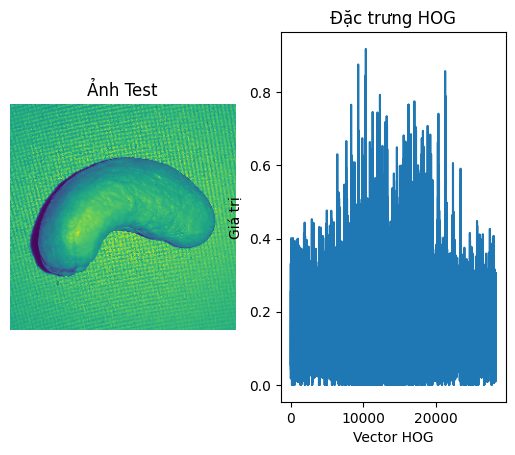

In [68]:
import cv2
from skimage.feature import hog
from matplotlib import pyplot as plt

# Đường dẫn đến ảnh test
image_path = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\TEST_FOLDER\\abc.jpg'

# Đọc ảnh
test_image = cv2.imread(image_path)
# scale lại
height_test, width_test = test_image.shape[:2]
new_width_test = int(width_test / 3)
new_height_test = int(height_test / 3)
test_image = cv2.resize(test_image, (new_width_test, new_height_test))

# grayimg
gray_test_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# tìm bouding box
edges_test = cv2.Canny(test_image, 300, 400)
contours_test, _ = cv2.findContours(edges_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_area_test = 0
max_box_test = None
for cnt in contours_test:
    area_test = cv2.contourArea(cnt)
    if area_test > max_area_test:
        max_area_test = area_test
        max_box_test = cv2.boundingRect(cnt)

if max_box_test is not None:
    x_t, y_t, w_t, h_t = max_box_test
    center_x_test = x_t + w_t // 2
    center_y_test = y_t + h_t // 2

    new_x_test = center_x_test - (bb_h // 2)
    new_y_test = center_y_test - (bb_h // 2)
    # chỉ trích xuất phần bouding box
    roi_test = gray_test_img[new_y_test:new_y_test+bb_h, new_x_test:new_x_test+bb_w]

# Trích xuất đặc trưng HOG của ảnh test
roi_hog_feature_test = hog(roi_test, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

# Hiển thị ảnh test và đặc trưng HOG
plt.subplot(1, 2, 1)
plt.imshow(roi_test)
plt.title("Ảnh Test")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(roi_hog_feature_test)
plt.title("Đặc trưng HOG")
plt.xlabel("Vector HOG")
plt.ylabel("Giá trị")
plt.show()


In [12]:
import pandas as pd
import numpy as np
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('ds_feature.csv')
X = np.array(df['Features'].tolist())


print(X.shape)



(252,)


# Lấy đặc trưng từ folder


In [24]:
import os
import re
from skimage.feature import hog
from skimage import io, color
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

import ast  # For safely evaluating literal expressions

df = pd.read_csv('ds_feature.csv', converters={'Features': ast.literal_eval})
features_all = np.array(df['Features'].tolist())
labels = df['Label'].values
print(features_all.shape)

X = features_all  # Đặc trưng
Y = labels  # Nhãn

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
# Tạo một mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Số lân cận (k) có thể thay đổi

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(x_train, y_train)
knn_accuracy = knn_model.score(x_test, y_test)
print(f"KNN Accuracy: {knn_accuracy}")

(252, 7057)
KNN Accuracy: 0.6825396825396826


In [2]:
import cv2
import numpy as np

# Đọc ảnh đầu vào
image = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\tong\\002_lanh.jpg')
height, width = image.shape[:2]
new_width = int(width / 3)
new_height = int(height / 3)
image = cv2.resize(image, (new_width, new_height))
# Chuyển ảnh sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng kỹ thuật ngưỡng để tạo ảnh nhị phân
# Điều này sẽ tạo ra một ảnh trong đó đối tượng là màu trắng và nền là màu đen
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Tạo ảnh đối tượng chính (foreground)
foreground = cv2.bitwise_and(image, image, mask=binary_image)

# Tạo ảnh nền (background)
background = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(binary_image))

# Hiển thị ảnh đối tượng chính và ảnh nền
cv2.imshow('Foreground', foreground)
cv2.imshow('Background', background)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2
import numpy as np

# Load ảnh gốc
img = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\tong\\002_lanh.jpg')
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(grayimg, (5, 5), 0)
height, width = img.shape[:2]
# Thu nhỏ ảnh về một nửa kích thước
new_width = int(width / 3)
new_height = int(height / 3)
img = cv2.resize(img, (new_width, new_height))
edges = cv2.Canny(img, 300, 400)

# Tìm các contour trên hình ảnh cạnh
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Tìm bounding box có diện tích lớn nhất
max_area = 0
max_box = None
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
        max_area = area
        max_box = cv2.boundingRect(cnt)

if max_box is not None:
    x, y, w, h = max_box
    center_x = x + w // 2
    center_y = y + h // 2
        
    # Tính tọa độ góc trái trên của bounding box mới
    new_x = center_x - (120//2)
    new_y = center_y - (120//2)
        
    #img = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + bb_h, new_y + bb_w), (0, 255, 0), 2)
    image = img[new_y:new_y+120, new_x:new_x+120]

# Chuyển đổi ảnh gốc sang không gian màu grayscale
img = cv2.GaussianBlur(img, (5, 5), 0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng phân đoạn ảnh dựa trên ngưỡng (thresholding)
_, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tạo ảnh nền mới
new_background = cv2.imread('C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\nen.jpg')

# Đảo ngược mask để tạo mask cho vật thể (vùng đen)
object_mask = cv2.bitwise_not(binary_mask)

# Lấy vật thể từ ảnh gốc
objectt = cv2.bitwise_and(image, image, mask=object_mask)

# Resize ảnh nền mới có kích thước bằng ảnh gốc
new_background = cv2.resize(new_background, (image.shape[1], image.shape[0]))

# Tạo ảnh mới bằng cách kết hợp vật thể và ảnh nền mới
result = cv2.add(objectt, new_background)

# Lưu ảnh kết quả
cv2.imwrite('output_image.png', result)

# Hiển thị ảnh kết quả
cv2.imshow('Object on New Background', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [42]:
import os
import re
from skimage.feature import hog
from skimage import io, color
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

def histoGram(path):
    image = cv2.imread(path)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    result = hist.tolist()
    return result # là dạng list

a = []
parent_folder = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\nut'
for filename in os.listdir(parent_folder):
    if os.path.isfile(os.path.join(parent_folder, filename)):
        file_path = os.path.join(parent_folder, filename)
        hist = histoGram(file_path)
        a.extend(hist)


a = np.array(a)
a = a.reshape(-1)  # Biến đổi mảng 3 chiều thành mảng 1 chiều

print(a.shape)

(16896,)


In [24]:
import numpy as np
c = []
# Tạo một mảng numpy có shape là (512,)
a = [1, 2, 3, 4, 5]
b = [0, 1, 0, 0, 0]
a = np.array(a)
b = np.array(b)

c = a.tolist() + b.tolist()

# Kiểm tra shape của mảng a_flattened
print(c
      
      )  # Kết quả sẽ là (512,)

[1, 2, 3, 4, 5, 0, 1, 0, 0, 0]


In [37]:
def are(img_path, new_x, new_y):
    image = cv2.imread(img_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    roi = gray_image[new_y:new_y+120, new_x:new_x+120]

    # Sử dụng hàm threshold để tạo hình ảnh nhị phân (binary image)
    _, binary_image = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Tìm các contours trong hình ảnh nhị phân
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Tạo danh sách để lưu trữ các diện tích của các hạt điều
    areas = []

    # Duyệt qua từng contour và tính toán diện tích
    for contour in contours:
        area = cv2.contourArea(contour)  # Tính toán diện tích
        areas.append(area)

    # Tính trung bình diện tích của các hạt điều
    average_area = np.mean(areas)
    return average_area

import cv2
import numpy as np

# Load ảnh gốc
path = 'C:\\Users\\ThuyLe\\Desktop\\computer_vision_cashew\\data\\tong\\003_lanh.jpg'

print(are(path, 120, 120))

a = []

a.append(are(path, 120, 120))
a.append(5)
print(a)


231.8170731707317
[231.8170731707317, 5]


# Lọc thông thấp

In [17]:
from pydub import AudioSegment

# Đường dẫn đến file âm thanh đầu vào
input_audio_path = "C:\\Users\\ThuyLe\\Desktop\\mix22.wav"

# Tải file âm thanh
audio = AudioSegment.from_file(input_audio_path, format="wav")
from pydub.playback import play

# Áp dụng lọc thông thấp (ví dụ: giảm tần số cắt)
cutoff_frequency = 100  # Điều chỉnh tần số cắt theo nhu cầu
filtered_audio = audio.low_pass_filter(cutoff_frequency)

# Phát tín hiệu âm thanh đã lọc
play(filtered_audio)
# Lưu tín hiệu âm thanh đã lọc thành file âm thanh mới
output_audio_path = "1111.wav"
filtered_audio.export(output_audio_path, format="wav")


<_io.BufferedRandom name='1111.wav'>

# Lọc thông cao

In [18]:
from pydub import AudioSegment

# Đường dẫn đến file âm thanh đầu vào
input_audio_path = "C:\\Users\\ThuyLe\\Desktop\\mix22.wav"

# Tải file âm thanh
audio = AudioSegment.from_file(input_audio_path, format="wav")

# Áp dụng lọc thông cao (ví dụ: giảm tần số cắt)
cutoff_frequency = 1000  # Điều chỉnh tần số cắt theo nhu cầu
filtered_audio = audio.high_pass_filter(cutoff_frequency)

# Lưu tín hiệu âm thanh đã lọc thành file âm thanh mới
output_audio_path = "mix22_out.wav"
filtered_audio.export(output_audio_path, format="wav")


<_io.BufferedRandom name='mix22_out.wav'>

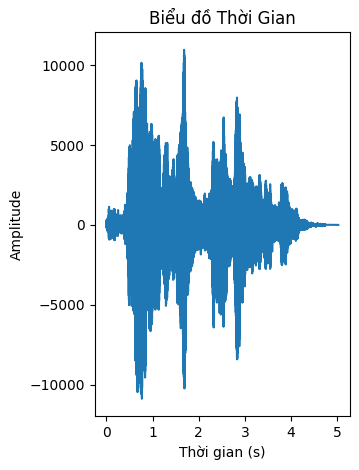

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Đường dẫn đến file âm thanh
audio_file = "C:\\Users\\ThuyLe\\Desktop\\mix22.wav"

# Đọc tín hiệu âm thanh
sample_rate, audio_data = wavfile.read(audio_file)

# Tính biểu đồ tần số
frequencies, amplitudes = np.fft.fftfreq(len(audio_data)), np.fft.fft(audio_data)



# Tính biểu đồ thời gian
time = np.arange(0, len(audio_data)) / sample_rate

# Vẽ biểu đồ thời gian
plt.subplot(1, 2, 2)
plt.title("Biểu đồ Thời Gian")
plt.xlabel("Thời gian (s)")
plt.ylabel("Amplitude")
plt.plot(time, audio_data)

plt.tight_layout()
plt.show()


In [23]:
import numpy as np
from scipy.io import wavfile

# Đường dẫn đến file âm thanh
audio_file = "C:\\Users\\ThuyLe\\Desktop\\abcd\\mix23.wav"

# Đọc tín hiệu âm thanh
sample_rate, audio_data = wavfile.read(audio_file)

# Tính biểu đồ tần số bằng biến đổi Fourier rời rạc (DFT)
frequencies, amplitudes = np.fft.fftfreq(len(audio_data)), np.fft.fft(audio_data)

# Tìm tần số chính (tần số cực đại) trong biểu đồ tần số
main_frequency_index = np.argmax(np.abs(amplitudes))
main_frequency = frequencies[main_frequency_index]

# Tần số chính (tần số cực đại) trong Hz
main_frequency_hz = np.abs(main_frequency) * sample_rate

print("Tần số chính của âm thanh là: {:.2f} Hz".format(main_frequency_hz))


Tần số chính của âm thanh là: 2568.69 Hz


In [24]:
from scipy.signal import butter, lfilter
import numpy as np
from scipy.io import wavfile

# Đường dẫn đến file âm thanh
audio_file = "C:\\Users\\ThuyLe\\Desktop\\abcd\\mix23.wav"

# Đọc tín hiệu âm thanh
sample_rate, audio_data = wavfile.read(audio_file)

# Tần số cắt của bộ lọc thông cao (ở đây, chọn 127 Hz cho tiếng ồn)
highpass_cutoff = 127  # Hz

# Tạo bộ lọc thông cao
b, a = butter(N=6, Wn=highpass_cutoff / (sample_rate / 2), btype='high')

# Áp dụng bộ lọc thông cao vào tín hiệu
filtered_audio_data = lfilter(b, a, audio_data)

# Lưu tín hiệu âm thanh đã lọc vào một file mới
wavfile.write("am_thanh_da_loc.wav", sample_rate, np.int16(filtered_audio_data))


In [26]:
######################################################################################################
# MFCC là một tập hợp các hệ số mô tả hình dạng phổ công suất của tín hiệu âm thanh.                 #
# Chuyển đổi tín hiệu âm thanh thô --> tần số bằng cách sử dụng Biến đổi Fourier rời rạc (DFT)       #
# Áp dụng thang đo mel để ước tính nhận thức thính giác của con người về tần số âm thanh.            #
# Cuối cùng, các hệ số epstral được tính toán từ phổ thang đo mel.                                   #
######################################################################################################
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import minmax_scale
import numpy as np
import os
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import audio_utils
import scipy.fft as fft
audio_utils_instance = audio_utils.AudioUtils()


RATE = 44100
FRAME = 512

def calculate_rms_energy(frame):
    return np.sqrt(np.mean(np.square(frame)))

def feature_extract(file):
    features = np.array([])

    data,sample_rate=librosa.load(file, sr=RATE)
    mfcc = librosa.feature.mfcc(y = data, sr = RATE, n_mfcc = 13)
    mfcc_scaled = np.mean(mfcc.T, axis = 0)

    zcr = librosa.feature.zero_crossing_rate(data, frame_length=FRAME, hop_length=int(FRAME/3))
    feature_zcr = np.mean(zcr)

    ste = audio_utils.AudioUtils.ste(data, 'hamming', int(20 * 0.001 * RATE))
    feature_ste = np.mean(ste) 

    ste_acc = np.diff(ste)
    feature_steacc = np.mean(ste_acc[ste_acc > 0])

    stzcr = audio_utils.AudioUtils.stzcr(data, 'hamming', int(20 * 0.001 * RATE))
    feature_stezcr = np.mean(stzcr)

    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=RATE, hop_length=int(FRAME/3))

    feature_spectral_centroid = np.mean(spectral_centroid)

    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=RATE, hop_length= int(FRAME/3))
    feature_spectral_bandwidth = np.mean(spectral_bandwidth)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=RATE, hop_length= int(FRAME/3),
                                            roll_percent=0.90)
    feature_spectral_rolloff = np.mean(spectral_rolloff)

    spectral_flatness = librosa.feature.spectral_flatness(y=data, hop_length=int(FRAME/3))
    feature_spectral_flatness = np.mean(spectral_flatness)


    # Tính toán và thêm đặc trưng RMS Energy
    rms_energy = [calculate_rms_energy(data[i:i + FRAME]) for i in range(0, len(data), int(FRAME / 3))]
    feature_rms_energy = np.mean(rms_energy)

    features = np.hstack([mfcc_scaled,feature_zcr,feature_ste,feature_steacc,feature_stezcr,
                         feature_spectral_centroid,feature_spectral_bandwidth,
                         feature_spectral_rolloff,feature_spectral_flatness, feature_rms_energy])

    return features

df = pd.read_csv('ds_feature.csv', converters={'Features': ast.literal_eval})
features_all = np.array(df['Features'].tolist())
labels = df['Label'].values

X = features_all  # Đặc trưng
Y = labels  # Nhãn

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier

# Tạo một mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Điều chỉnh số cây và các siêu tham số khác nếu cần

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, Y_train)

# Đánh giá mô hình trên tập kiểm tra
rf_accuracy = rf_model.score(X_test, Y_test)

print(f"Random Accuracy: {rf_accuracy}")

file_test = 'C:\\Users\\ThuyLe\\Desktop\\abcd\\Tieng-em-be-so-sinh-khoc-www_tiengdong_com.wav'

feature_test = feature_extract(file_test)
label_test = rf_model.predict([feature_test])

if label_test[0] == 1:
    print("Tiếng khóc")
else:
    print("Tiếng ồn")

        

AttributeError: module 'audio_utils' has no attribute 'AudioUtils'